In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.optimize import curve_fit
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
from scipy import optimize
from PIL import Image 
import numpy.polynomial.polynomial as poly
from IPython.display import clear_output
%matplotlib inline

In [2]:
# 2spot3 location 119,55 is the nice one

In [3]:
cd /Users/austinmcdonald/Desktop/9-5-17/one-small/

/Users/austinmcdonald/Desktop/9-5-17/one-small


In [4]:
files = os.listdir()
files = [x for x in files if x != '.DS_Store']
#files

In [5]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

In [6]:
eCoeff = 0.01953
eOffset= 1918.14
z=0
w=1
BSend = len(files)
Shape = 281
xvs = np.arange(0,Shape)
neighborhood_size = 9
Row = int(4) # define the area to take around the spots
Col = int(4) # define the area to take around the spots

DataSub = np.zeros(Shape**2).reshape((Shape,Shape))
Datatot = DataSub
fitts = []
AllPairs =[]
SpotInfo2 = []
ImageB = []
        

MeanFit = np.zeros(Shape**2).reshape((Shape,Shape))
eCoeffM = eCoeff*np.ones(Shape**2).reshape((Shape,Shape))
eOffsetM = eOffset*np.ones(Shape**2).reshape((Shape,Shape))

Xc=[168]
Yc=[192]
for q in range(0,len(files)):
    Images = (np.array(Image.open(files[q])))
    Images = eCoeffM*(Images - eOffsetM)# - MeanFit
    Images[Images < 0] = 0 

    SpotInfoHolder = []

    for we in range(0,len(Xc)):
        Xindex = int(Xc[we])
        Yindex = int(Yc[we])

        spot1 = np.array(Images[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1])
        spot2 = np.array(Images[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1])
        spot = spot1[2:7,2:7]
        SpotRemove = np.zeros(5**2).reshape((5,5))
        spot2[2:7,2:7]=SpotRemove
        spotB = spot2

        ATot = spot.sum()
        ATotB = spot2.sum()
        SpotInfo2.append([z,w,Xindex,Yindex,ATot,ATotB])

########################################################################################  

    clear_output()
    print('Finding all areas in dataset'+' '+str(z)) 
    print('Finding all areas in folder'+' '+str(w)) 
    print('On file'+' '+str(q+1)+' '+'of'+' '+str(len(files)))

Par = len(AllPairs)
AVG = 5
Mnumb = 5
Tau = []
Signal = []
BackG  = []
SignalF = []
BackGF  = []
sigmas =  []
#for x in range(0,1):
HoldArea = np.array(SpotInfo2)[:,4]
HoldAreaB = np.array(SpotInfo2)[:,5]
aa = np.add.reduceat(HoldArea, np.arange(0, len(HoldArea), AVG))
aaB = np.add.reduceat(HoldAreaB, np.arange(0, len(HoldAreaB), AVG))
vals =np.arange(0,len(aa))

sigmas.append(np.sqrt(np.array(aa)))

coefs = poly.polyfit(vals,aaB, 3)
ffit  = poly.polyval(vals, coefs)
Sig = np.array(aa-ffit)
bac = np.array(aaB-ffit)

SigF = np.array(HoldArea)
bacF = np.array(HoldAreaB)

meanI = np.mean(Sig[:Mnumb])
sigmaI = np.std(Sig[:Mnumb])
meanE = np.mean(Sig[-Mnumb:])
sigmaE = np.std(Sig[-Mnumb:])
meanM = np.mean(Sig)
T = len(Sig)
tau = ((meanM - meanE)/(meanI -meanE))*T

 

Finding all areas in dataset 0
Finding all areas in folder 1
On file 10660 of 10660


In [7]:
len(SigF)

10660

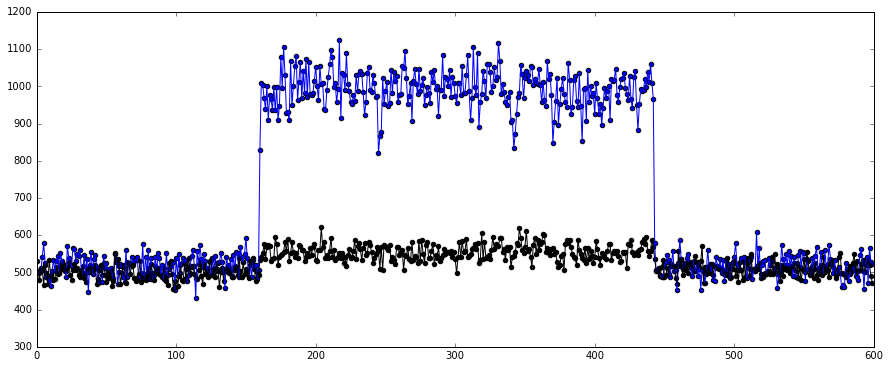

In [8]:
Signal = SigF[9100:9700]
Backgr = bacF[9100:9700]

vals =np.arange(0,len(Signal))
plt.figure(figsize=(15,6))

plt.plot(vals,Signal)
plt.scatter(vals,Signal)

plt.plot(vals,Backgr*(25/56),color='k')
plt.scatter(vals,Backgr*(25/56),color='k')

#coefs = poly.polyfit(vals,bacF, 3)
#ffit  = poly.polyval(vals, coefs)
#plt.plot(vals,ffit,color='r')

plt.xlim(0,len(vals))
plt.show()

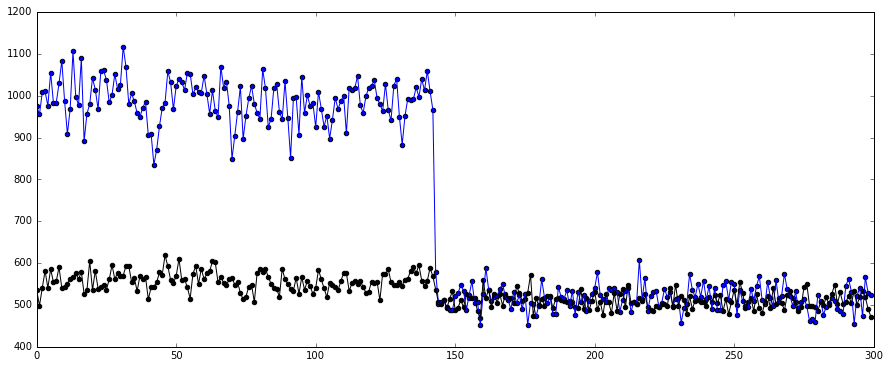

In [9]:
Signal = SigF[9400:9700]
Backgr = bacF[9400:9700]

vals =np.arange(0,len(Signal))
plt.figure(figsize=(15,6))

plt.plot(vals,Signal)
plt.scatter(vals,Signal)

plt.plot(vals,Backgr*(25/56),color='k')
plt.scatter(vals,Backgr*(25/56),color='k')

#coefs = poly.polyfit(vals,bacF, 3)
#ffit  = poly.polyval(vals, coefs)
#plt.plot(vals,ffit,color='r')

plt.xlim(0,len(vals))
plt.show()

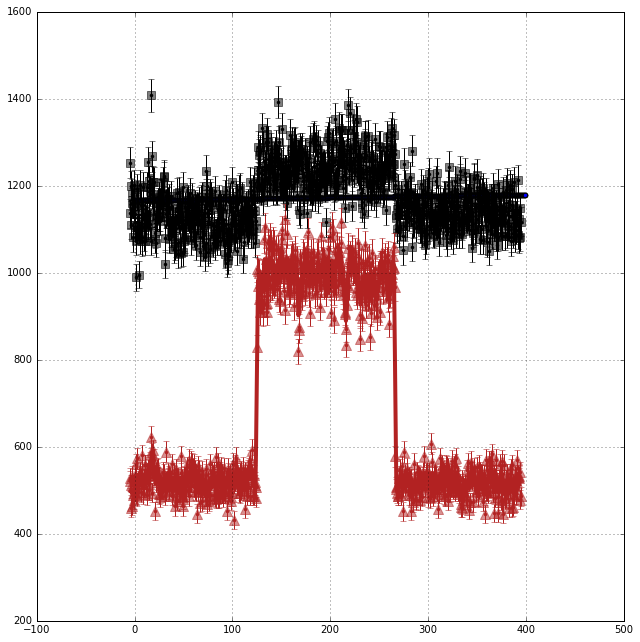

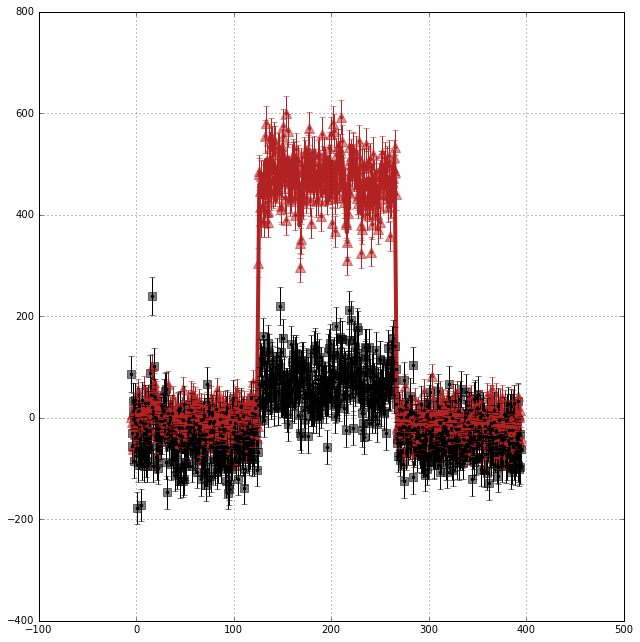

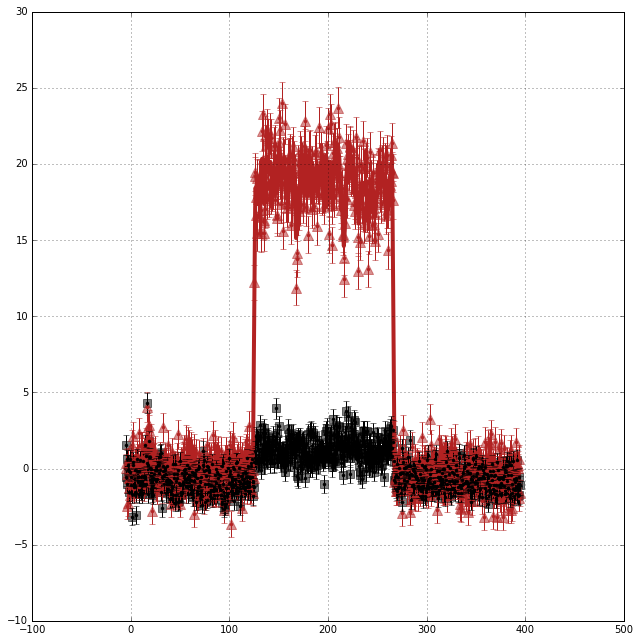

In [11]:
#Raw plot

dataFull  = SigF[9000:9800] #np.add.reduceat(Signal, np.arange(0, len(Signal), 5))
dataFullB = bacF[9000:9800] # np.add.reduceat(BackGF[15], np.arange(0, len(BackGF[15]), 5))
times    = np.arange(0,len(dataFull))*0.5

K=5
Atime = running_mean(times,K)
Adat  = running_mean(dataFull,K)
AdatB = running_mean(dataFullB,K)

fig, ax = plt.subplots(figsize=(9,9))

b1 = ax.scatter(times-5,dataFullB, color='k',marker='s',label='Background', alpha=0.5,s=75)
bf1 = ax.plot(Atime-5,AdatB,color='k',label='moving avg',linestyle=':',linewidth=4)

s1 = ax.scatter(times-5,dataFull,color='firebrick',marker='^',label='Signal', alpha=0.5,s=100)
sf1 = ax.plot(Atime-5,Adat,color='firebrick',label='moving avg',linestyle='-',linewidth=4)

valsF =np.arange(0,len(dataFull))*0.5
coefsF = poly.polyfit(valsF,dataFullB, 1)
ffitF  = poly.polyval(valsF, coefsF)
plt.scatter(valsF,ffitF)

baerry = np.sqrt(dataFull)
naerry = np.sqrt(dataFullB)
ax.errorbar(times-5,dataFull,yerr=baerry,color='firebrick',fmt='.')
ax.errorbar(times-5,dataFullB,yerr=naerry,color='k',fmt='.')

#ax.set_xlim(0,40)
#ax.set_ylim(0,15)
ax.grid(True)
plt.tight_layout()
plt.show()


#Subtracted plot
fig, ax = plt.subplots(figsize=(9,9))

dataSub  = dataFull-ffitF*(25/56)
dataSubB = dataFullB-ffitF
Adat  = running_mean(dataSub,K)
AdatB = running_mean(dataSubB,K)

ax.scatter(times-5,dataSubB, color='k',marker='s',label='Background', alpha=0.5,s=75)
ax.plot(Atime-5,AdatB,color='k',label='moving avg',linestyle=':',linewidth=4)

ax.scatter(times-5,dataSub,color='firebrick',marker='^',label='Signal', alpha=0.5,s=100)
ax.plot(Atime-5,Adat,color='firebrick',label='moving avg',linestyle='-',linewidth=4)
ax.errorbar(times-5,dataSub,yerr=baerry,color='firebrick',fmt='.')
ax.errorbar(times-5,dataSubB,yerr=naerry,color='k',fmt='.')



#ax.set_xlim(0,40)
#ax.set_ylim(0,15)
ax.grid(True)
plt.tight_layout()
plt.show()


#per pixel plot

fig, ax = plt.subplots(figsize=(9,9))

bknorm=56
signorm=25

ax.scatter(times-5,dataSubB/bknorm, color='k',marker='s',label='Background', alpha=0.5,s=75)
ax.plot(Atime-5,AdatB/bknorm,color='k',label='moving avg',linestyle=':',linewidth=4)

ax.scatter(times-5,dataSub/signorm,color='firebrick',marker='^',label='Signal', alpha=0.5,s=100)
ax.plot(Atime-5,Adat/signorm,color='firebrick',label='moving avg',linestyle='-',linewidth=4)
ax.errorbar(times-5,dataSub/signorm,yerr=baerry/signorm,color='firebrick',fmt='.')
ax.errorbar(times-5,dataSubB/bknorm,yerr=naerry/bknorm,color='k',fmt='.')


#ax.set_xlim(0,40)
#ax.set_ylim(0,15)
ax.grid(True)
plt.tight_layout()
plt.show()

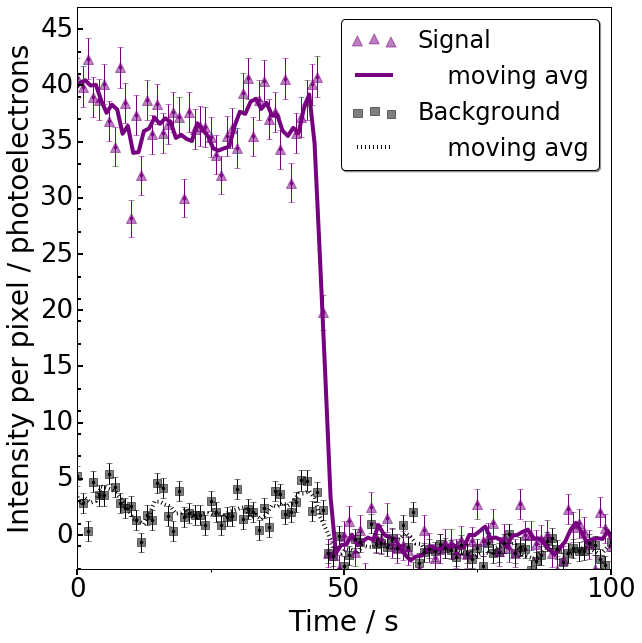

In [24]:
#per pixel plot

dataFull = SigF[9000:9800] #np.add.reduceat(Signal, np.arange(0, len(Signal), 5))
dataFullB = bacF[9000:9800] # np.add.reduceat(BackGF[15], np.arange(0, len(BackGF[15]), 5))

dataFull  =  np.add.reduceat(dataFull, np.arange(0, len(dataFull), 2))
dataFullB =  np.add.reduceat(dataFullB, np.arange(0, len(dataFullB), 2))
times    = np.arange(0,len(dataFull)) - 220

K=4
Atime = running_mean(times,K)
Adat  = running_mean(dataFull,K)
AdatB = running_mean(dataFullB,K)


valsF =np.arange(0,len(dataFull))*0.5
coefsF = poly.polyfit(valsF,dataFullB, 1)
ffitF  = poly.polyval(valsF, coefsF)

baerry = np.sqrt(dataFull)
naerry = np.sqrt(dataFullB)

dataSub  = dataFull-ffitF*(25/56)
dataSubB = dataFullB-ffitF
Adat  = running_mean(dataSub,K)
AdatB = running_mean(dataSubB,K)


fig, ax = plt.subplots(figsize=(9,9))

bknorm=56
signorm=25
#plt.axhline(0,linewidth=1,color='black',linestyle='-')

ax.scatter(times-5,dataSubB/bknorm, color='k',marker='s',label='Background', alpha=0.5,s=75)
ax.plot(Atime-5,AdatB/bknorm,color='k',label='moving avg',linestyle=':',linewidth=4)

ax.scatter(times-5,dataSub/signorm,color='#76007F',marker='^',label='Signal', alpha=0.5,s=100)
ax.plot(Atime-5,Adat/signorm,color='#76007F',label='moving avg',linestyle='-',linewidth=4)
ax.errorbar(times-5,dataSub/signorm,yerr=baerry/signorm,color='#76007F',fmt='.')
ax.errorbar(times-5,dataSubB/bknorm,yerr=naerry/bknorm,color='k',fmt='.')



ax.set_xlabel(r'Time / s', fontsize=28)
ax.set_ylabel('Intensity per pixel / photoelectrons', fontsize=28)

handles,labels = ax.get_legend_handles_labels()
handles = [handles[3], handles[1], handles[2], handles[0]]
aa = '\n   25 pixels'
bb = '\n   56 pixels'

labels = [labels[3], '    '+labels[1], labels[2], '    '+labels[0]]
ax.legend(handles,labels,fontsize=24,shadow=True, fancybox=True)

plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)

xmajor_ticks = np.arange(0, 400, 50)
xminor_ticks = np.arange(0, 400, 25)
ymajor_ticks = np.arange(0, 47, 5)
yminor_ticks = np.arange(-5, 47, 2)
ax.tick_params(axis = 'x', which = 'major', direction='out',width=2,length=6,top="off",right='off')
ax.tick_params(axis = 'x', which = 'minor', direction='out',width=1,length=3,top="off",right='off')

ax.tick_params(axis = 'y', which = 'major', direction='in',width=2,length=6,top="off",right='off')
ax.tick_params(axis = 'y', which = 'minor', direction='in',width=2,length=4,top="off",right='off')

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor = True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor = True)

ax.set_xlim(0,100)
#ax.set_xlim(220,320)
ax.set_ylim(-3,47)
#plt.grid(True)
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/Ca-Photobleach-OnOff-fluo4.pdf')
plt.show()

In [16]:
plt.to_rgba('76007F')

AttributeError: module 'matplotlib.pyplot' has no attribute 'to_rgba'

In [11]:
#per pixel plot

dataFull = np.add.reduceat(SignalF[15], np.arange(0, len(SignalF[15]), 5))#[a:b]
dataFullB = np.add.reduceat(BackGF[15], np.arange(0, len(BackGF[15]), 5))
times    = np.arange(0,len(dataFull))*2.5

K=5
Atime = running_mean(times,K)
Adat  = running_mean(dataFull,K)
AdatB = running_mean(dataFullB,K)


valsF =np.arange(0,len(dataFull))*2.5
coefsF = poly.polyfit(valsF,dataFullB, 3)
ffitF  = poly.polyval(valsF, coefsF)

baerry = np.sqrt(dataFull)
naerry = np.sqrt(dataFullB)

dataSub  = dataFull-ffitF*(25/56)
dataSubB = dataFullB-ffitF
Adat  = running_mean(dataSub,K)
AdatB = running_mean(dataSubB,K)


fig, ax = plt.subplots(figsize=(9,9))

bknorm=56
signorm=25
#plt.axhline(0,linewidth=1,color='black',linestyle='-')

ax.scatter(times-5,dataSubB/bknorm, color='k',marker='s',label='Background', alpha=0.5,s=75)
ax.plot(Atime-5,AdatB/bknorm,color='k',label='moving avg',linestyle=':',linewidth=4)

ax.scatter(times-5,dataSub/signorm,color='firebrick',marker='^',label='Signal', alpha=0.5,s=100)
ax.plot(Atime-5,Adat/signorm,color='firebrick',label='moving avg',linestyle='-',linewidth=4)
ax.errorbar(times-5,dataSub/signorm,yerr=baerry/signorm,color='firebrick',fmt='.')
ax.errorbar(times-5,dataSubB/bknorm,yerr=naerry/bknorm,color='k',fmt='.')



ax.set_xlabel(r'Time / s', fontsize=28)
ax.set_ylabel('Intensity per pixel / photoelectrons', fontsize=28)

handles,labels = ax.get_legend_handles_labels()
handles = [handles[3], handles[1], handles[2], handles[0]]
aa = '\n   25 pixels'
bb = '\n   56 pixels'

labels = [labels[3], '    '+labels[1], labels[2], '    '+labels[0]]
ax.legend(handles,labels,fontsize=24,shadow=True, fancybox=True)

plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)

xmajor_ticks = np.arange(0, 260, 50)
xminor_ticks = np.arange(0, 250, 5)
ymajor_ticks = np.arange(0, 20, 5)
yminor_ticks = np.arange(-5, 20, 1)
ax.tick_params(axis = 'x', which = 'major', direction='out',width=2,length=6,top="off",right='off')
ax.tick_params(axis = 'x', which = 'minor', direction='out',width=1,length=3,top="off",right='off')

ax.tick_params(axis = 'y', which = 'major', direction='in',width=2,length=6,top="off",right='off')
ax.tick_params(axis = 'y', which = 'minor', direction='in',width=2,length=4,top="off",right='off')

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor = True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor = True)

ax.set_xlim(0,250)
ax.set_ylim(-2,12)
#plt.grid(True)
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/singlebaplots/Ba-Photobleach12.png')
plt.show()

IndexError: list index out of range

In [11]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

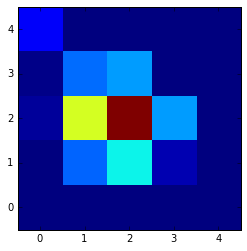

In [12]:
Row = int(2)
Col = int(2)
Xindex = int(Xc[15])
Yindex = int(Yc[15])
testspot = DataSub[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]-sum(dataFullB/bknorm)
testspot[testspot < 0] = 0 
plt.imshow(testspot, interpolation='nearest')
plt.xlim(-0.5,4.5)
plt.ylim(-0.5,4.5)
plt.show()

height fit = 1864.08584564
x fit = 1.95829901307
y fit = 1.75225825521
sigmax fit = 0.663715553037
sigmay fit = 0.717980974876


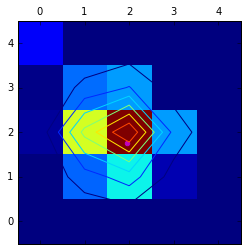

In [13]:
plt.matshow(testspot)#,cmap='gray')
params = fitgaussian(testspot)
fit = gaussian(*params)
plt.contour(fit(*np.indices(testspot.shape)))
plt.scatter(params[1],params[2],color='m')
plt.xlim(-0.5,4.5)
plt.ylim(-0.5,4.5)
print('height fit =', params[0])
print('x fit =', params[1])
print('y fit =', params[2])
print('sigmax fit =', params[3])
print('sigmay fit =', params[4])
plt.show()

In [14]:
params[3]*160

106.194488485975

In [15]:
params[4]*160

114.87695598008635

In [16]:
sigmaT = np.sqrt((params[3]*160)**2+(params[4]*160)**2)
sigmaT

156.4416325664258

In [173]:
testspot.sum()

5530.8582793843079

In [178]:
(sigmaT)/np.sqrt(testspot.sum())

2.1035656684427853

In [17]:
(sigmaT)/np.sqrt(2*np.pi*params[3]*params[4]*params[0])

2.0940255930832379